<a href="https://colab.research.google.com/github/mevangelista-alvarado/neural_networks/blob/main/Neurona_Artificial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

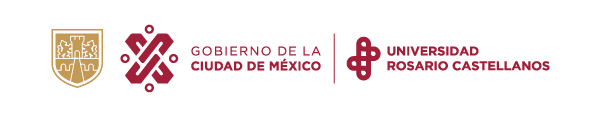

## Introducción

Un perceptrón es una neurona artificial, y por tanto, una unidad de una red neuronal. El perceptrón efectúa cálculos para detectar características o tendencias en los datos de entrada.

El perceptrón desempeña un papel esencial en los proyectos de Machine Learning. Se utiliza en gran medida para clasificar datos, o como algoritmo que permite simplificar o supervisar las capacidades de aprendizaje de los clasificadores binarios.

## Neurona artificial

### Perceptrón

Con base en el trabajo McCullock y W. Pitts, el investigador _F. Rosenblatt_ en _The Perceptron: A perceiving and Recoggnizing Automaton_ en _1957_, da a conocer el primer concepto de la regla de aprendizaje de un perceptrón

Según la regla de aprendizaje del perceptrón, el algoritmo aprende automáticamente los coeficientes de peso óptimo. Para determinar si una neurona “se enciende” o no, las características de los datos de entrada se multiplican por esos pesos.




El perceptrón recibe múltiples señales de entrada. Si la suma de las señales supera un umbral determinado, se produce una señal o, por el contrario, no se emite ningún resultado, como se muestra en la imagen.


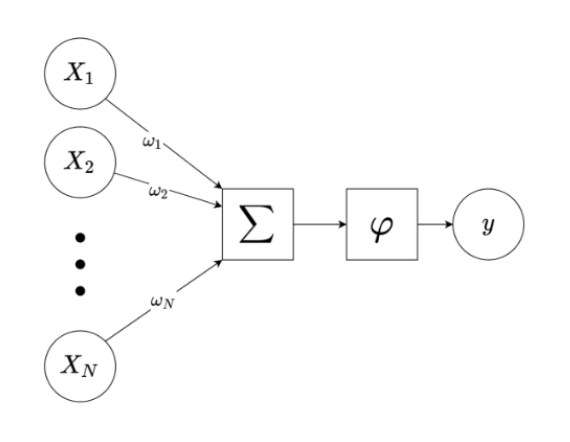

El modelo anterior consta de:

* entradas $x_1, \dots, x_n$,
* pesos $w_1, \dots, w_n$ correspondientes a cada entrada.
* una función de activación $\varphi$
* una salida $y$

En este modelo, la salida de la neurona $y$ está dada por

$$y = \varphi(w_1\cdot x + \dots+ w_2\cdot y)=\varphi(\Sigma_{i=0}^{n}w_i\cdot x_{i}) = \varphi(\vec{w}\cdot\vec{x})$$


La función de activación $\varphi$ es seleccionada de acuerdo a la tarea realizada por la neurona.

### Implementación

Mostramos un ejemplo de un perceptrón en Python. En este ejemplo, crearemos un perceptrón para resolver la operación lógica OR (inclusivo):

__OBS__
El operador OR inclusivo (a nivel de bit) compara los valores (en formato binario) de cada operando y produce un valor cuyo patrón de bits muestra qué bits en cualquiera de los operandos tiene el valor 1. Si ambos bits son 0, el resultado de ese bit es 0; de lo contrario, el resultado es 1.

Definimos las entradas, los pesos y los valores esperados (labels) para cada entrada

In [58]:
# Definición de entradas y pesos iniciales
inputs = [[0, 0], [0, 1], [1, 0], [1, 1]] # Cambia las entradas para probar otros casos
weights = [0.4, 0.6]  # Pesos iniciales (ajustables)

# Definición de los objetivos (resultados esperados para las entradas
# correspondientes) para la operación OR
targets = [0, 1, 1, 1]

Definimos la función de activación.  

In [59]:
# Definición de una función de activación simple
def step_function(x, umbral=0):
    # Esto describe una función piso
    return 1 if x >= umbral else 0

Definimos una función que describe el Perceptrón

In [60]:
# Función para realizar la operación del perceptrón
def perceptron(inputs, weights, umbral):
    weighted_sum = sum(w * x for w, x in zip(weights, inputs))
    return step_function(weighted_sum, umbral)

Definimos una función de entrenamiento para el perceptrón

In [61]:
# Función de entrenamiento del perceptrón
def train_perceptron(inputs, weights, target, umbral, learning_rate):
    for i in range(len(weights)):
        output = perceptron(inputs, weights, umbral)
        error = target - output
        weights[i] += learning_rate * error * inputs[i]
    return weights

Entrenamos el perceptrón durante $1000$ épocas y con un learnign rate de $0.1$

In [73]:
# Entrenamiento del perceptrón
epochs = 1000
learning_rate = 0.0001
umbral = 0.45
for _ in range(epochs):
    for i in range(len(inputs)):
        weights = train_perceptron(inputs[i], weights, targets[i], umbral, learning_rate)
    print(f"epoca {_} tiene los pesos {weights}")

epoca 0 tiene los pesos [0.41309999999991864, 0.6010000000000287]
epoca 1 tiene los pesos [0.41319999999991863, 0.6010000000000287]
epoca 2 tiene los pesos [0.4132999999999186, 0.6010000000000287]
epoca 3 tiene los pesos [0.4133999999999186, 0.6010000000000287]
epoca 4 tiene los pesos [0.4134999999999186, 0.6010000000000287]
epoca 5 tiene los pesos [0.4135999999999186, 0.6010000000000287]
epoca 6 tiene los pesos [0.4136999999999186, 0.6010000000000287]
epoca 7 tiene los pesos [0.41379999999991857, 0.6010000000000287]
epoca 8 tiene los pesos [0.41389999999991856, 0.6010000000000287]
epoca 9 tiene los pesos [0.41399999999991854, 0.6010000000000287]
epoca 10 tiene los pesos [0.41409999999991853, 0.6010000000000287]
epoca 11 tiene los pesos [0.4141999999999185, 0.6010000000000287]
epoca 12 tiene los pesos [0.4142999999999185, 0.6010000000000287]
epoca 13 tiene los pesos [0.4143999999999185, 0.6010000000000287]
epoca 14 tiene los pesos [0.4144999999999185, 0.6010000000000287]
epoca 15 tiene

Porbamos el modelos

In [74]:
# Prueba del perceptrón
_inputs = [[0,0], [0,1], [1,0], [1,1]]
for i in range(len(_inputs)):
    result = perceptron(_inputs[i], weights, umbral)
    print(f"Entradas: {_inputs[i]}, Salida: {result}")

Entradas: [0, 0], Salida: 0
Entradas: [0, 1], Salida: 1
Entradas: [1, 0], Salida: 1
Entradas: [1, 1], Salida: 1


### Learning rate

En implementación anterior, el __learning_rate__ (tasa de aprendizaje) controla cuánto se ajustan los pesos de la neurona durante cada iteración del entrenamiento.



Es un valor que se elige antes de iniciar el entrenamiento y afecta la velocidad y la calidad del aprendizaje de la red.



Cuando el __learning rate__ es pequeño, los ajustes de los pesos son pequeños, lo que hace que el entrenamiento sea más lento pero potencialmente más preciso. Por otro lado, cuando el __learning rate__ es grande, los ajustes de los pesos son mayores y el entrenamiento es más rápido, pero podría no converger o converger de manera inestable.



El __learning rate__ se multiplica por el error cometido por la red para determinar cuánto cambiar los pesos en cada iteración. La fórmula general para actualizar los pesos es:



Nuevo Peso = Peso Actual + (Learning Rate * Error)


El valor del __learning rate__ es crítico y debe elegirse cuidadosamente. Valores típicos de learning_rate pueden variar según el problema, pero comúnmente se prueban valores como $0.1$, $0.01$, $0.001$, y luego se selecciona el que proporciona el mejor equilibrio entre velocidad y precisión en el aprendizaje.